# Decision Trees

In [8]:
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Training & Visualizing a Decision tree

#### Loading Iris dataset

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [45]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### Decision Tree classification based on petal length & width

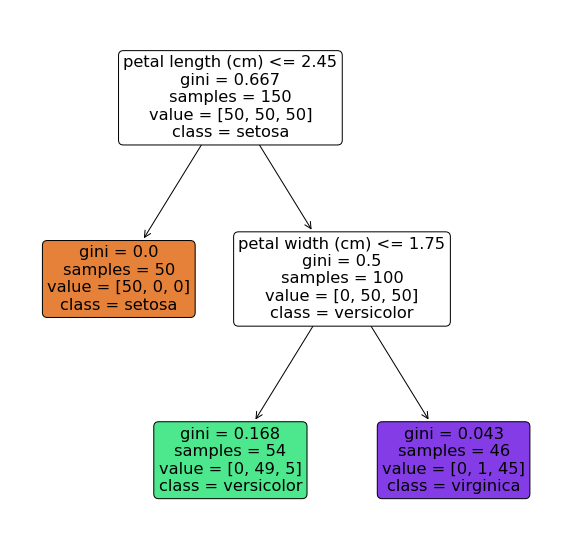

In [46]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(tree_clf,
                filled=True,
                feature_names=iris.feature_names[2:],  # for petal length and width
                class_names=iris.target_names,
                label='all',
                rounded=True,
                proportion=False);

#### Decision Tree classification based on sepal length & width

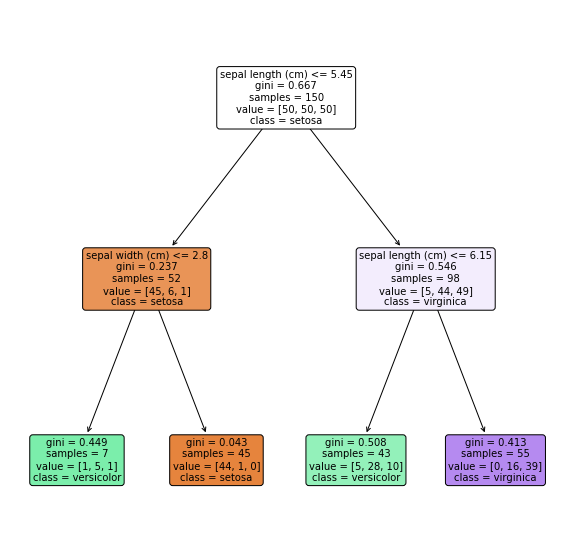

In [51]:
X2 = iris.data[:, :2] # sepal length and width
y2 = iris.target

tree_clf2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf2.fit(X2, y2)
plt.figure(figsize=(10,10))
tree.plot_tree(tree_clf2,
                filled=True,
                feature_names=iris.feature_names[:2],  # for sepal length and width
                class_names=iris.target_names,
                label='all',
                rounded=True,
                proportion=False);

#### Decision Tree classification based on all the features

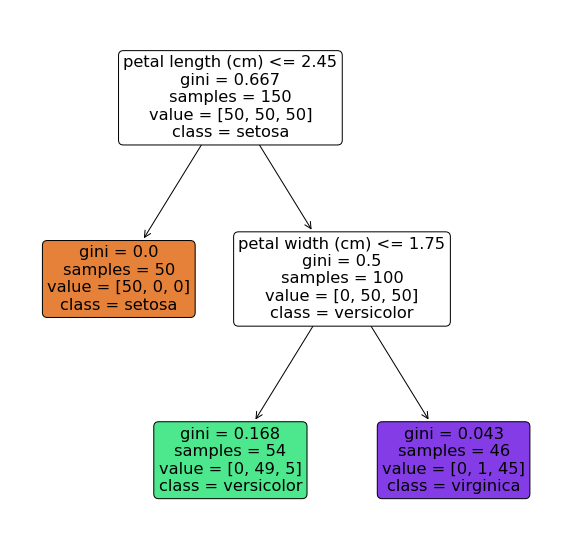

In [52]:
X3 = iris.data # all features
y3 = iris.target

tree_clf3 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf3.fit(X3, y3)
plt.figure(figsize=(10,10))
tree.plot_tree(tree_clf3,
                filled=True,
                feature_names=iris.feature_names,  # for sepal length and width
                class_names=iris.target_names,
                label='all',
                rounded=True,
                proportion=False);

#### Decision Tree decision boundaries

Text(4.05, 0.5, '(Depth=2)')

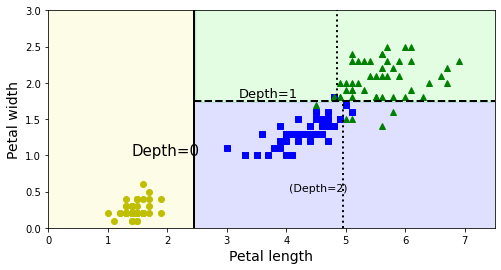

In [53]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

#### Estimating class probablities

In [54]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [55]:
tree_clf.predict([[5, 1.5]])

array([1])

#### Regularized Hyperparameters